In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
# Define transformations for the dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)) # Normalize to [-1, 1]
])

# Load the Fashion-MNIST dataset
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

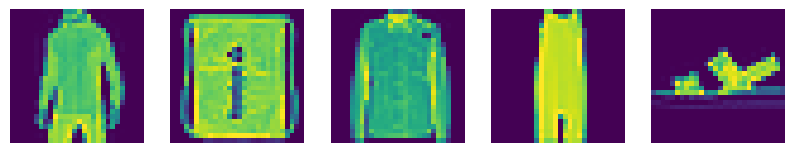

In [4]:
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize to [0, 1]
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')

dataiter = iter(train_loader)
images, _ = next(dataiter)
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    imshow(images[i])
plt.show()

In [5]:
class Generator(nn.Module):
    def __init__(self, latent_dim):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            # Input: latent_dim
            nn.Linear(latent_dim, 256),
            nn.LeakyReLU(0.2),
            nn.BatchNorm1d(256),

            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.BatchNorm1d(512),

            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.BatchNorm1d(1024),

            nn.Linear(1024, 28 * 28), # Output: 28x28 image
            nn.Tanh() # Normalize to [-1, 1]
        )

    def forward(self, input):
        return self.main(input).view(-1, 1, 28, 28)

In [6]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            # Input: 28x28 image
            nn.Linear(28 * 28, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),

            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),

            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),

            nn.Linear(256, 1), # Output: probability of real/fake
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input.view(input.size(0), -1))

[Epoch 1/200] [D loss: 0.3530] [G loss: 2.0086]


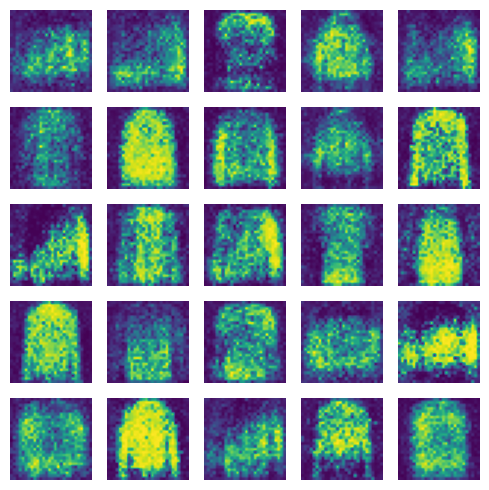

[Epoch 2/200] [D loss: 0.5186] [G loss: 1.2767]
[Epoch 3/200] [D loss: 0.5609] [G loss: 1.1645]
[Epoch 4/200] [D loss: 0.5867] [G loss: 1.0815]
[Epoch 5/200] [D loss: 0.6027] [G loss: 1.0297]
[Epoch 6/200] [D loss: 0.6151] [G loss: 0.9869]
[Epoch 7/200] [D loss: 0.6212] [G loss: 0.9750]
[Epoch 8/200] [D loss: 0.6290] [G loss: 0.9360]
[Epoch 9/200] [D loss: 0.6359] [G loss: 0.9192]
[Epoch 10/200] [D loss: 0.6417] [G loss: 0.9093]
[Epoch 11/200] [D loss: 0.6455] [G loss: 0.8904]
[Epoch 12/200] [D loss: 0.6500] [G loss: 0.8749]
[Epoch 13/200] [D loss: 0.6532] [G loss: 0.8644]
[Epoch 14/200] [D loss: 0.6571] [G loss: 0.8506]
[Epoch 15/200] [D loss: 0.6583] [G loss: 0.8436]
[Epoch 16/200] [D loss: 0.6599] [G loss: 0.8378]
[Epoch 17/200] [D loss: 0.6617] [G loss: 0.8330]
[Epoch 18/200] [D loss: 0.6637] [G loss: 0.8252]
[Epoch 19/200] [D loss: 0.6627] [G loss: 0.8261]
[Epoch 20/200] [D loss: 0.6650] [G loss: 0.8196]
[Epoch 21/200] [D loss: 0.6654] [G loss: 0.8149]
[Epoch 22/200] [D loss: 0.66

<Figure size 640x480 with 0 Axes>

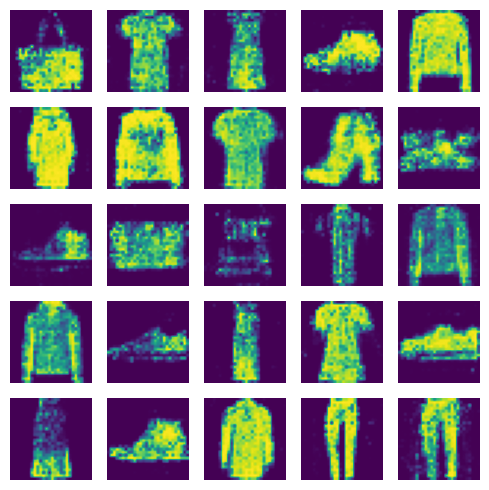

[Epoch 52/200] [D loss: 0.6620] [G loss: 0.8091]
[Epoch 53/200] [D loss: 0.6601] [G loss: 0.8180]
[Epoch 54/200] [D loss: 0.6612] [G loss: 0.8121]
[Epoch 55/200] [D loss: 0.6602] [G loss: 0.8144]
[Epoch 56/200] [D loss: 0.6596] [G loss: 0.8137]
[Epoch 57/200] [D loss: 0.6602] [G loss: 0.8147]
[Epoch 58/200] [D loss: 0.6592] [G loss: 0.8171]
[Epoch 59/200] [D loss: 0.6592] [G loss: 0.8180]
[Epoch 60/200] [D loss: 0.6586] [G loss: 0.8182]
[Epoch 61/200] [D loss: 0.6586] [G loss: 0.8200]
[Epoch 62/200] [D loss: 0.6583] [G loss: 0.8183]
[Epoch 63/200] [D loss: 0.6573] [G loss: 0.8194]
[Epoch 64/200] [D loss: 0.6577] [G loss: 0.8207]
[Epoch 65/200] [D loss: 0.6564] [G loss: 0.8213]
[Epoch 66/200] [D loss: 0.6579] [G loss: 0.8205]
[Epoch 67/200] [D loss: 0.6562] [G loss: 0.8232]
[Epoch 68/200] [D loss: 0.6560] [G loss: 0.8215]
[Epoch 69/200] [D loss: 0.6556] [G loss: 0.8213]
[Epoch 70/200] [D loss: 0.6547] [G loss: 0.8243]
[Epoch 71/200] [D loss: 0.6541] [G loss: 0.8277]
[Epoch 72/200] [D lo

<Figure size 640x480 with 0 Axes>

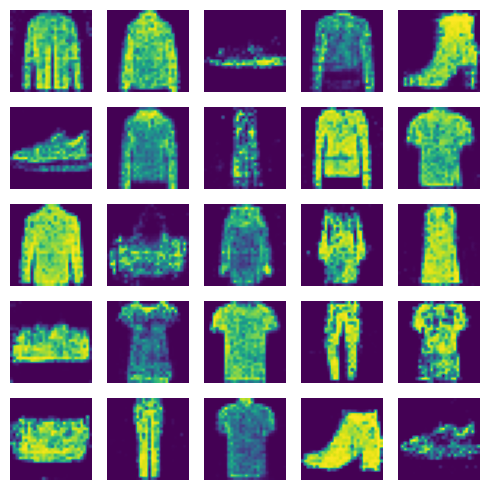

[Epoch 102/200] [D loss: 0.6436] [G loss: 0.8572]
[Epoch 103/200] [D loss: 0.6426] [G loss: 0.8570]
[Epoch 104/200] [D loss: 0.6443] [G loss: 0.8559]
[Epoch 105/200] [D loss: 0.6430] [G loss: 0.8553]
[Epoch 106/200] [D loss: 0.6423] [G loss: 0.8547]
[Epoch 107/200] [D loss: 0.6435] [G loss: 0.8552]
[Epoch 108/200] [D loss: 0.6426] [G loss: 0.8549]
[Epoch 109/200] [D loss: 0.6398] [G loss: 0.8615]
[Epoch 110/200] [D loss: 0.6406] [G loss: 0.8653]
[Epoch 111/200] [D loss: 0.6378] [G loss: 0.8685]
[Epoch 112/200] [D loss: 0.6397] [G loss: 0.8657]
[Epoch 113/200] [D loss: 0.6386] [G loss: 0.8656]
[Epoch 114/200] [D loss: 0.6396] [G loss: 0.8660]
[Epoch 115/200] [D loss: 0.6385] [G loss: 0.8668]
[Epoch 116/200] [D loss: 0.6387] [G loss: 0.8664]
[Epoch 117/200] [D loss: 0.6396] [G loss: 0.8658]
[Epoch 118/200] [D loss: 0.6377] [G loss: 0.8655]
[Epoch 119/200] [D loss: 0.6377] [G loss: 0.8698]
[Epoch 120/200] [D loss: 0.6377] [G loss: 0.8678]
[Epoch 121/200] [D loss: 0.6372] [G loss: 0.8697]


<Figure size 640x480 with 0 Axes>

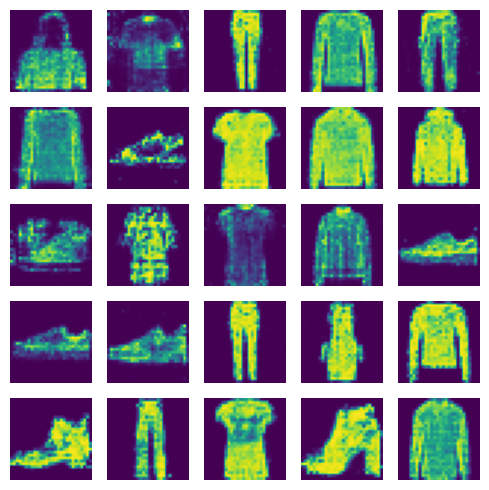

[Epoch 152/200] [D loss: 0.6280] [G loss: 0.8954]
[Epoch 153/200] [D loss: 0.6277] [G loss: 0.8973]
[Epoch 154/200] [D loss: 0.6283] [G loss: 0.8938]
[Epoch 155/200] [D loss: 0.6272] [G loss: 0.8967]
[Epoch 156/200] [D loss: 0.6271] [G loss: 0.8975]
[Epoch 157/200] [D loss: 0.6276] [G loss: 0.8966]
[Epoch 158/200] [D loss: 0.6273] [G loss: 0.8952]
[Epoch 159/200] [D loss: 0.6269] [G loss: 0.8995]
[Epoch 160/200] [D loss: 0.6262] [G loss: 0.8993]
[Epoch 161/200] [D loss: 0.6258] [G loss: 0.8999]
[Epoch 162/200] [D loss: 0.6258] [G loss: 0.9052]
[Epoch 163/200] [D loss: 0.6251] [G loss: 0.9034]
[Epoch 164/200] [D loss: 0.6258] [G loss: 0.9054]
[Epoch 165/200] [D loss: 0.6267] [G loss: 0.9029]
[Epoch 166/200] [D loss: 0.6255] [G loss: 0.9034]
[Epoch 167/200] [D loss: 0.6259] [G loss: 0.9044]
[Epoch 168/200] [D loss: 0.6238] [G loss: 0.9037]
[Epoch 169/200] [D loss: 0.6237] [G loss: 0.9072]
[Epoch 170/200] [D loss: 0.6229] [G loss: 0.9057]
[Epoch 171/200] [D loss: 0.6234] [G loss: 0.9114]


<Figure size 640x480 with 0 Axes>

In [7]:
# Hyperparameters
latent_dim = 100
epochs = 200
lr = 0.0002
b1 = 0.5  # Adam: beta1
b2 = 0.999  # Adam: beta2

# Initialize Generator and Discriminator
generator = Generator(latent_dim)
discriminator = Discriminator()

# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
generator.to(device)
discriminator.to(device)

# Optimizers
optimizer_G = optim.Adam(generator.parameters(), lr=lr, betas=(b1, b2))
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr, betas=(b1, b2))

# Loss function
criterion = nn.BCELoss()

# Lists to track losses
g_losses = []
d_losses = []

# Training loop
for epoch in range(epochs):
    epoch_g_loss = 0.0
    epoch_d_loss = 0.0
    batch_count = 0

    for i, (imgs, _) in enumerate(train_loader):
        # Adversarial ground truths
        real = torch.ones(imgs.size(0), 1).to(device)
        fake = torch.zeros(imgs.size(0), 1).to(device)

        # Configure input
        real_imgs = imgs.to(device)

        # ---------------------
        #  Train Discriminator
        # ---------------------
        optimizer_D.zero_grad()

        # Real images
        output_real = discriminator(real_imgs)
        loss_real = criterion(output_real, real)

        # Fake images
        z = torch.randn(imgs.size(0), latent_dim).to(device)
        gen_imgs = generator(z)
        output_fake = discriminator(gen_imgs.detach())
        loss_fake = criterion(output_fake, fake)

        # Total discriminator loss
        d_loss = (loss_real + loss_fake) / 2
        d_loss.backward()
        optimizer_D.step()

        # -----------------
        #  Train Generator
        # -----------------
        optimizer_G.zero_grad()

        z = torch.randn(imgs.size(0), latent_dim).to(device)
        gen_imgs = generator(z)

        # Generator wants discriminator to think fakes are real
        g_loss = criterion(discriminator(gen_imgs), real)

        g_loss.backward()
        optimizer_G.step()

        # Accumulate losses
        epoch_d_loss += d_loss.item()
        epoch_g_loss += g_loss.item()
        batch_count += 1

    # Save average loss per epoch
    avg_d_loss = epoch_d_loss / batch_count
    avg_g_loss = epoch_g_loss / batch_count
    d_losses.append(avg_d_loss)
    g_losses.append(avg_g_loss)

    print(f"[Epoch {epoch+1}/{epochs}] [D loss: {avg_d_loss:.4f}] [G loss: {avg_g_loss:.4f}]")


    # Save generated images for visualization
    if epoch % 50 == 0:
        with torch.no_grad():
            z = torch.randn(25, latent_dim).to(device)
            generated_samples = generator(z).cpu()
            generated_samples = generated_samples.view(generated_samples.size(0), 28, 28)
            generated_samples = (generated_samples + 1) / 2  # Denormalize
            fig = plt.figure(figsize=(5, 5))
            for k in range(generated_samples.size(0)):
                plt.subplot(5, 5, k + 1)
                plt.imshow(generated_samples[k])
                plt.axis('off')
            plt.tight_layout()
            plt.show()
            plt.savefig(f"generated_epoch_{epoch}.png")
            plt.close(fig)

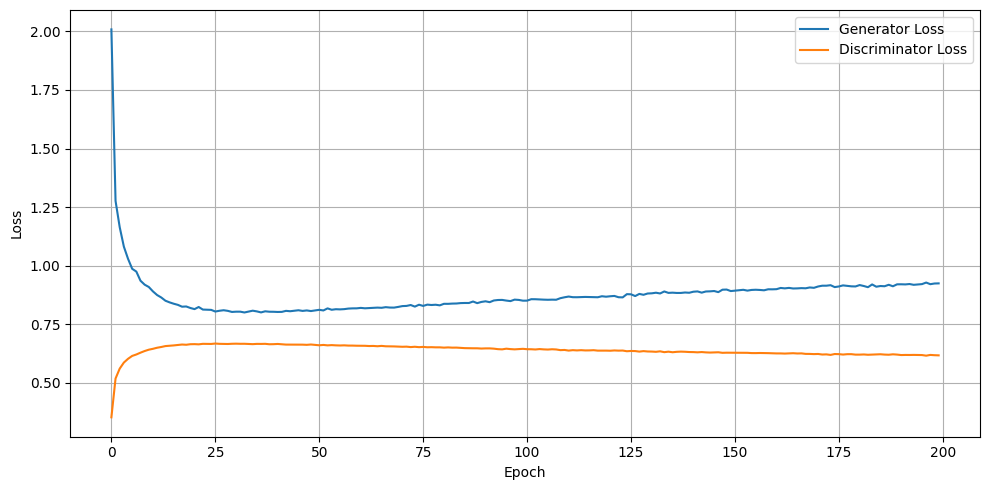

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(range(epochs), g_losses, label="Generator Loss")
plt.plot(range(epochs), d_losses, label="Discriminator Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()